# Best Route

## A-Star Search Example


This Jupyter Notebook demonstrates the implementation of the A* search algorithm for finding the best route in a metro system. The notebook includes the following key components:

1. **Known information**:
    - `heuristic_graph`: Represents the straight line distances between metro stations.
    - `distance_graph`: Represents the actual distances between connected metro stations.
    - `line_config`: Configuration of metro lines, including their speeds and the stations they serve.

2. **Utility Functions**:
    - Functions to calculate travel time, extract station/line information from states, and find neighbors for a given station.

4. **Search Problem**:
    - `routing`: An instance of the search problem configured with the metro data.

5. **A-Star Search**:
    - `AStar`: The A* search algorithm implementation.
    - `pathfinder`: An instance of A* used to find the optimal route between two stations.

This notebook provides a comprehensive example of applying A* search to solve a real-world routing problem, with clear visualizations and detailed journey analysis.
```

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [2]:
from src.search import AStar
from src.search import SearchProblem
from typing import Dict, List
from prettytable import PrettyTable

In [3]:
from astar_metro_routing_utils import plot_graph, create_fixed_layout

In [4]:
line_config = {
    'R': { 'speed': 40.0, 'stations': ['E1', 'E2', 'E3', 'E4', 'E14']},
    'G': { 'speed': 40.0, 'stations': ['E2', 'E7', 'E9', 'E10', 'E13']},
    'B': { 'speed': 40.0, 'stations': ['E6', 'E7', 'E3', 'E8', 'E10', 'E12']},
    'Y': { 'speed': 40.0, 'stations': ['E11', 'E9', 'E8', 'E4', 'E5']},
}

In [5]:
heuristic_graph = {
    'E1': {'E2': 4.3, 'E3': 9, 'E4': 14.7, 'E5': 17.2, 'E6': 13.1, 'E7': 11.8, 'E8': 11.3, 'E9': 8.2, 'E10': 10.7, 'E11': 8.4, 'E12': 14.1, 'E13': 18.5, 'E14': 17.3},
    'E2': {'E1': 4.3, 'E3': 5.3, 'E4': 10.3, 'E5': 13.1, 'E6': 12.7, 'E7': 10.3, 'E8': 6.9, 'E9': 4.3, 'E10': 7.4, 'E11': 5.9, 'E12': 11.3, 'E13': 14.8, 'E14': 12.9},
    'E3': {'E1': 9, 'E2': 5.3, 'E4': 5.9, 'E5': 8.5, 'E6': 10.9, 'E7': 7.7, 'E8': 4.1, 'E9': 6.5, 'E10': 8.9, 'E11': 9.4, 'E12': 14.5, 'E13': 13.9, 'E14': 10.3},
    'E4': {'E1': 14.7, 'E2': 10.3, 'E3': 5.9, 'E5': 2.9, 'E6': 15, 'E7': 12.7, 'E8': 4, 'E9': 9.1, 'E10': 9.7, 'E11': 12.2, 'E12': 14.7, 'E13': 10.6, 'E14': 6},
    'E5': {'E1': 17.2, 'E2': 13.1, 'E3': 8.5, 'E4': 2.9, 'E6': 16, 'E7': 12.3, 'E8': 7, 'E9': 12, 'E10': 15.3, 'E11': 14.8, 'E12': 17.3, 'E13': 12.7, 'E14': 6.9},
    'E6': {'E1': 13.1, 'E2': 12.7, 'E3': 10.9, 'E4': 15, 'E5': 16, 'E7': 3.2, 'E8': 15.1, 'E9': 16.5, 'E10': 18.5, 'E11': 19, 'E12': 24.3, 'E13': 25.2, 'E14': 21.1},
    'E7': {'E1': 11.8, 'E2': 10.3, 'E3': 7.7, 'E4': 12.7, 'E5': 12.3, 'E6': 3.2, 'E8': 12, 'E9': 13.3, 'E10': 16.4, 'E11': 16, 'E12': 22.2, 'E13': 22.6, 'E14': 17.1},
    'E8': {'E1': 11.3, 'E2': 6.9, 'E3': 4.1, 'E4': 4, 'E5': 7, 'E6': 15.1, 'E7': 12, 'E9': 5, 'E10': 5.6, 'E11': 7.9, 'E12': 12.4, 'E13': 9.8, 'E14': 6.4},
    'E9': {'E1': 8.2, 'E2': 4.3, 'E3': 6.5, 'E4': 9.1, 'E5': 12, 'E6': 16.5, 'E7': 13.3, 'E8': 5, 'E10': 3, 'E11': 3.4, 'E12': 8.1, 'E13': 10.9, 'E14': 9.6},
    'E10': {'E1': 10.7, 'E2': 7.4, 'E3': 8.9, 'E4': 9.7, 'E5': 15.3, 'E6': 18.5, 'E7': 16.4, 'E8': 5.6, 'E9': 3, 'E11': 3.4, 'E12': 5.6, 'E13': 7.7, 'E14': 8.4},
    'E11': {'E1': 8.4, 'E2': 5.9, 'E3': 9.4, 'E4': 12.2, 'E5': 14.8, 'E6': 19, 'E7': 16, 'E8': 7.9, 'E9': 3.4, 'E10': 3.4, 'E12': 5.9, 'E13': 11.2, 'E14': 12.7},
    'E12': {'E1': 14.1, 'E2': 11.3, 'E3': 14.5, 'E4': 14.7, 'E5': 17.3, 'E6': 24.3, 'E7': 22.2, 'E8': 12.4, 'E9': 8.1, 'E10': 5.6, 'E11': 5.9, 'E13': 8.6, 'E14': 12.3},
    'E13': {'E1': 18.5, 'E2': 14.8, 'E3': 13.9, 'E4': 10.6, 'E5': 12.7, 'E6': 25.2, 'E7': 22.6, 'E8': 9.8, 'E9': 10.9, 'E10': 7.7, 'E11': 11.2, 'E12': 8.6, 'E14': 6.1},
    'E14': {'E1': 17.3, 'E2': 12.9, 'E3': 10.3, 'E4': 6, 'E5': 6.9, 'E6': 21.1, 'E7': 17.1, 'E8': 6.4, 'E9': 9.6, 'E10': 8.4, 'E11': 12.7, 'E12': 12.3, 'E13': 6.1}
}

In [6]:
fixed_pos = create_fixed_layout(heuristic_graph)

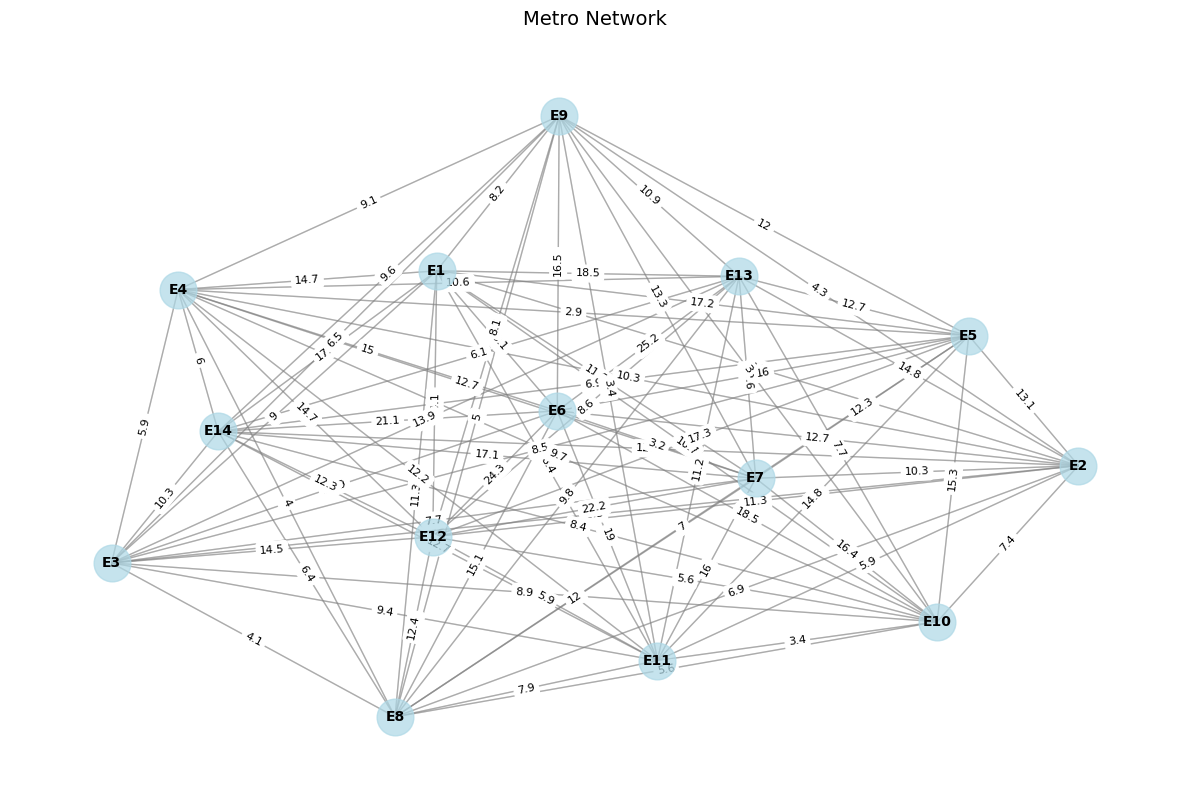

In [7]:
plot_graph(heuristic_graph, pos=fixed_pos)

In [8]:
distance_graph = {
    'E1': {'E2': 4.3},
    'E2': {'E1': 4.3, 'E3': 5.3, 'E7': 14.3,  'E9': 4.3},
    'E3': {'E2': 5.3, 'E4': 5.9, 'E7': 8.5, 'E8': 4.1},
    'E4': {'E3': 5.9, 'E5': 2.9, 'E8': 4, 'E14': 6.2},
    'E5': {'E4': 2.9},
    'E6': {'E7': 3.2},
    'E7': {'E2': 14.3, 'E3': 8.5, 'E6': 3.2},
    'E8': {'E3': 4.1, 'E4': 4, 'E9': 5, 'E10': 6},
    'E9': {'E2': 4.3, 'E8': 5, 'E10': 3, 'E11': 3.4},
    'E10': {'E8': 6, 'E9': 3, 'E12': 5.6, 'E13': 9.1},
    'E11': {'E9': 3.4},
    'E12': {'E10': 5.6},
    'E13': {'E10': 9.1},
    'E14': {'E4': 6.2}
}

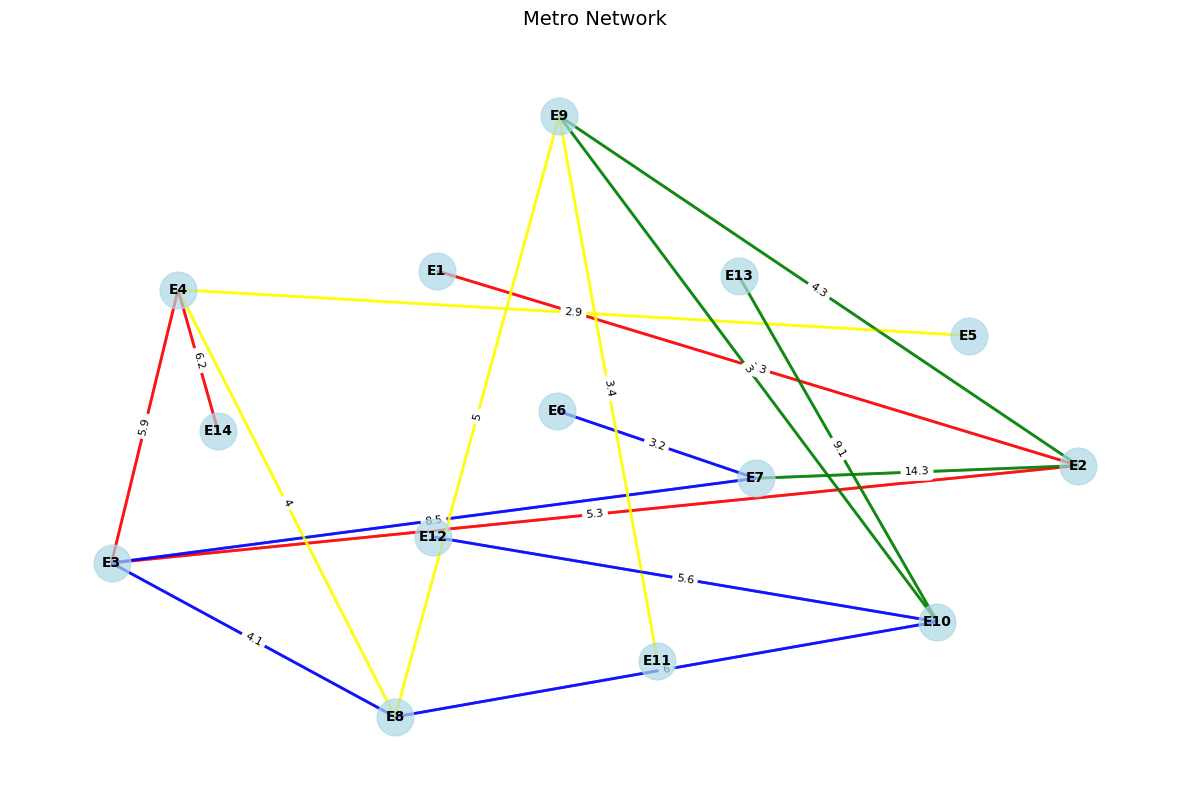

In [9]:
plot_graph(distance_graph, pos=fixed_pos, line_config=line_config)

In [10]:
def get_common_lines(station1: str, station2: str, line_config: Dict) -> List[str]:
    """Find common lines between two stations by checking each line's stations."""
    common_lines = []
    
    for line_id, config in line_config.items():
        stations = config['stations']
        if station1 in stations and station2 in stations:
            common_lines.append(line_id)
            
    return common_lines

In [11]:
def get_travel_time(distance: float, line_id: str, line_config: Dict) -> float:
        """Calculate travel time based on line speed."""
        speed = line_config[line_id]['speed']
        return distance / speed

In [12]:
def get_state_key(station: str, line: str = None) -> str:
    """Creates a compound state key from station and line."""
    return f"{station}_{line}" if line else station

In [13]:
def get_station_from_state(state: str) -> str:
    """Extracts station from compound state."""
    return state.split('_')[0]

def get_line_from_state(state: str) -> str:
    """Extracts line from compound state."""
    parts = state.split('_')
    return parts[1] if len(parts) > 1 else None

In [14]:

def get_neighbors_fn(state: str, distances: Dict, line_config: Dict) -> List[str]:
    """Get all neighboring stations with possible lines."""
    station = get_station_from_state(state)
    current_line = get_line_from_state(state)
    
    if station not in distances:
        return []
        
    neighbors = []
    for next_station in distances[station]:
        # For each physical neighbor, find possible lines to use
        common_lines = get_common_lines(station, next_station, line_config)
        for line in common_lines:
            neighbors.append(get_state_key(next_station, line))

    return neighbors


In [15]:
def heuristic_fn(state: str, goal_state: str, heuristics: Dict, line_config: Dict) -> float:
    """Estimate minimum travel time to goal."""
    
    if state not in heuristics or goal_state not in heuristics[state]:
        return 0.0
        
    distance = heuristics[state][goal_state]
    max_speed = max(config['speed'] for config in line_config.values())
    
    return distance / max_speed

In [16]:
def get_cost_fn(from_state: str, to_state: str, distances: Dict, line_config: Dict, line_change_penalty: float) -> float:
    """Calculate total time cost including travel time and line changes."""
    from_station = get_station_from_state(from_state)
    to_station = get_station_from_state(to_state)
    from_line = get_line_from_state(from_state)
    to_line = get_line_from_state(to_state)
    
    if to_station not in distances.get(from_station, {}):
        return float('inf')
        
    distance = distances[from_station][to_station]
    
    # Calculate travel time using the destination line's speed
    speed = line_config[to_line]['speed']
    travel_time = distance / speed
    
    # Add penalty if changing lines
    if from_line and to_line and from_line != to_line:
        travel_time += line_change_penalty
        
    return travel_time

In [17]:
# Create routing problem with line configuration
routing = SearchProblem(
    get_neighbors_fn=lambda state: get_neighbors_fn(state, 
                                                    distance_graph, 
                                                    line_config),
    get_cost_fn=lambda from_state, to_state: get_cost_fn(from_state, 
                                                         to_state, 
                                                        distance_graph, 
                                                        line_config,
                                                        line_change_penalty=3.0),
    heuristic_fn=lambda state, goal: heuristic_fn(get_station_from_state(state), 
                                               get_station_from_state(goal), 
                                               heuristic_graph, 
                                               line_config),
    is_goal_fn=lambda state, goal: get_station_from_state(state) == get_station_from_state(goal)
)


Route found: ['E7', 'E3_B', 'E8_B', 'E10_B']


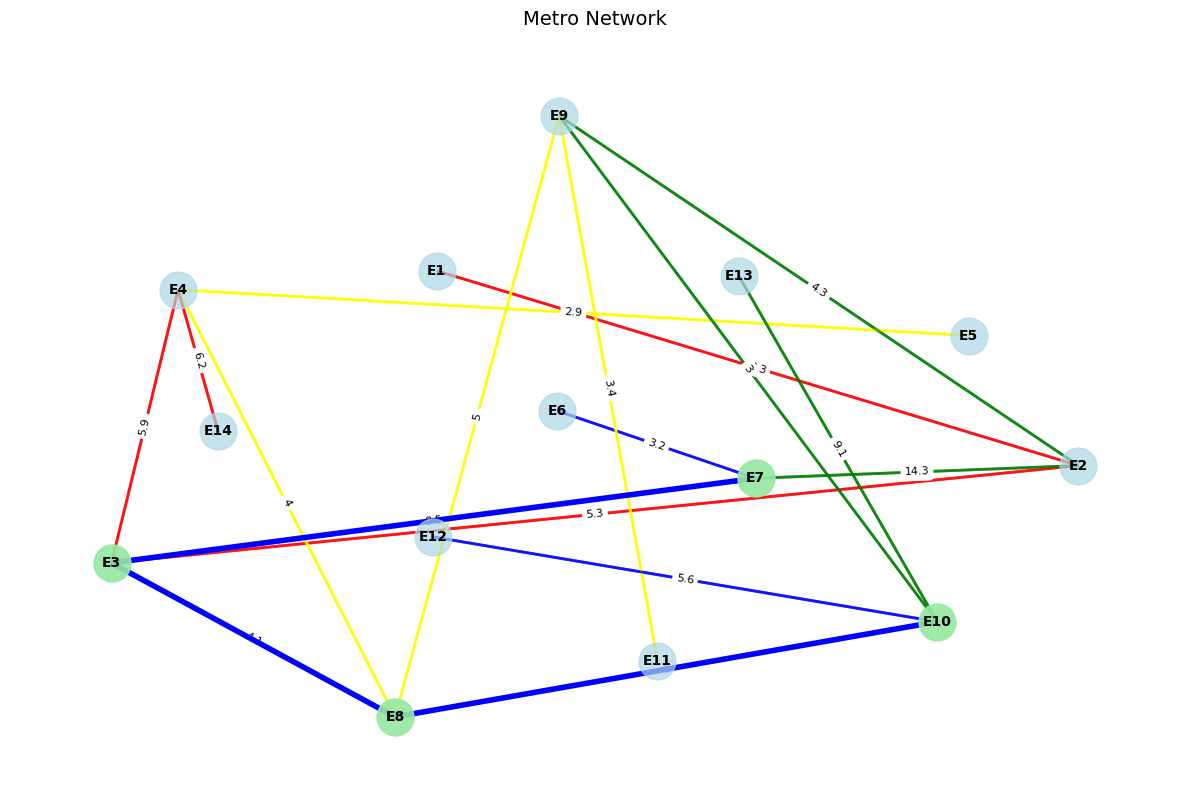

From Station,To Station,Line,Time (minutes)
E7,E3,B,12.75
E3,E8,B,6.15
E8,E10,B,9.0
Total,,,27.9


In [18]:
from IPython.display import display, HTML

pathfinder = AStar(problem=routing)
route = pathfinder.search(start='E7', goal='E10')

# Plot the route (extracting just stations for plotting)
if route:
    print(f"Route found: {route}")
    station_route = [get_station_from_state(state) for state in route]
    plot_graph(distance_graph, 
          path=station_route, 
          pos=fixed_pos, 
          line_config=line_config)


    # Create a PrettyTable instance
    table = PrettyTable()
    table.field_names = ["From Station", "To Station", "Line","Time (minutes)"]

    # Add rows to the table
    total_time = 0
    for step in routing.get_path_details(route):
        time = round(step['cost'] * 60, 2)
        total_time += time
        table.add_row([get_station_from_state(step['from_state']), 
            get_station_from_state(step['to_state']),
            get_line_from_state(step['to_state']), 
            time])
        
    # Add total time row
    table.add_row(["Total", "", "", f"{total_time:.1f}"])

    # Print the table
    display(HTML(table.get_html_string()))